## 0) Setup

In [1]:
# import libraries
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
# reproduction
seed_value = 0
# reproduce the same weights every time
random.seed(seed_value)
# reproduce the same graph every time
np.random.seed(seed_value)

## 1) Basic Graph

In [3]:
# create graph
G = nx.Graph()

In [4]:
# add nodes
G.add_nodes_from(['Charging Station', 'Mensa', 'Blood Storage', 'Waste Disposal',
                  'N1', 'N2', 'N3', 'N4'])
# add edges
G.add_edges_from([('Charging Station', 'N1'), ('N1', 'Mensa'), ('N1', 'N2'), ('Mensa', 'N3'),
                  ('N2', 'N3'), ('N2', 'Blood Storage'), ('N2', 'N4'), ('N3', 'N4'),
                  ('N3','Waste Disposal')])

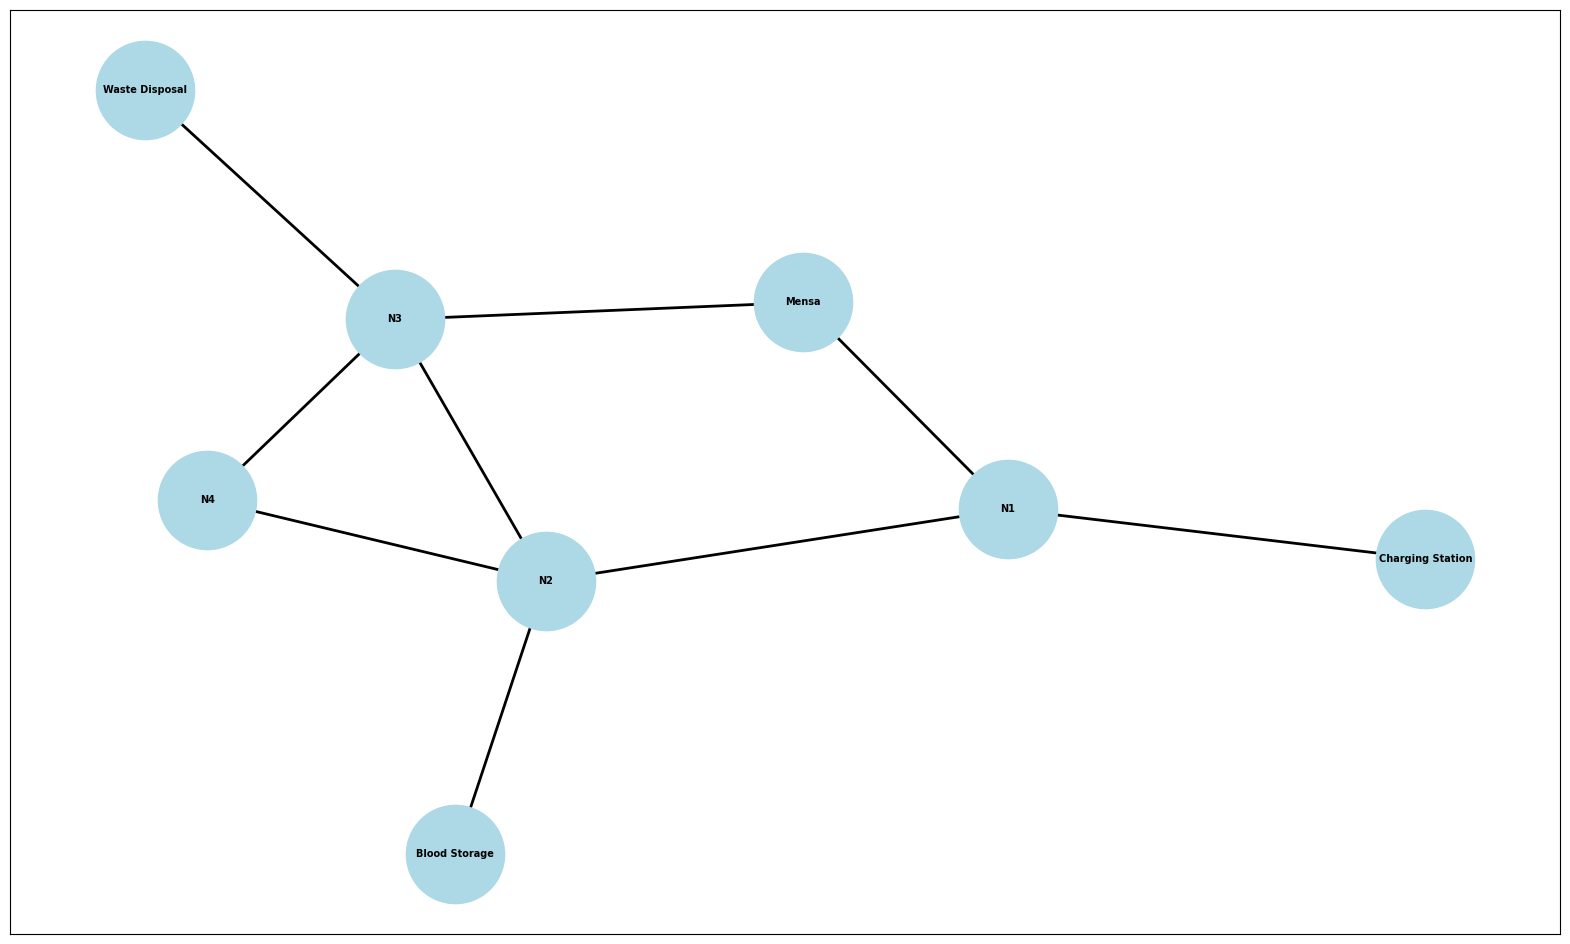

In [5]:
# plot graph
pos = nx.spring_layout(G)
plt.figure(figsize=(20, 12))
nx.draw_networkx(G, with_labels=True, node_size=5000, node_color='lightblue',
                 font_weight='bold', font_size=7, edge_color='black', linewidths=1,
                 width=2, pos=pos)
plt.show()

## 2) Weighted Graph

In [6]:
# add random edge weights
for (u, v) in G.edges():
    G[u][v]['weight'] = round(random.random(),2)

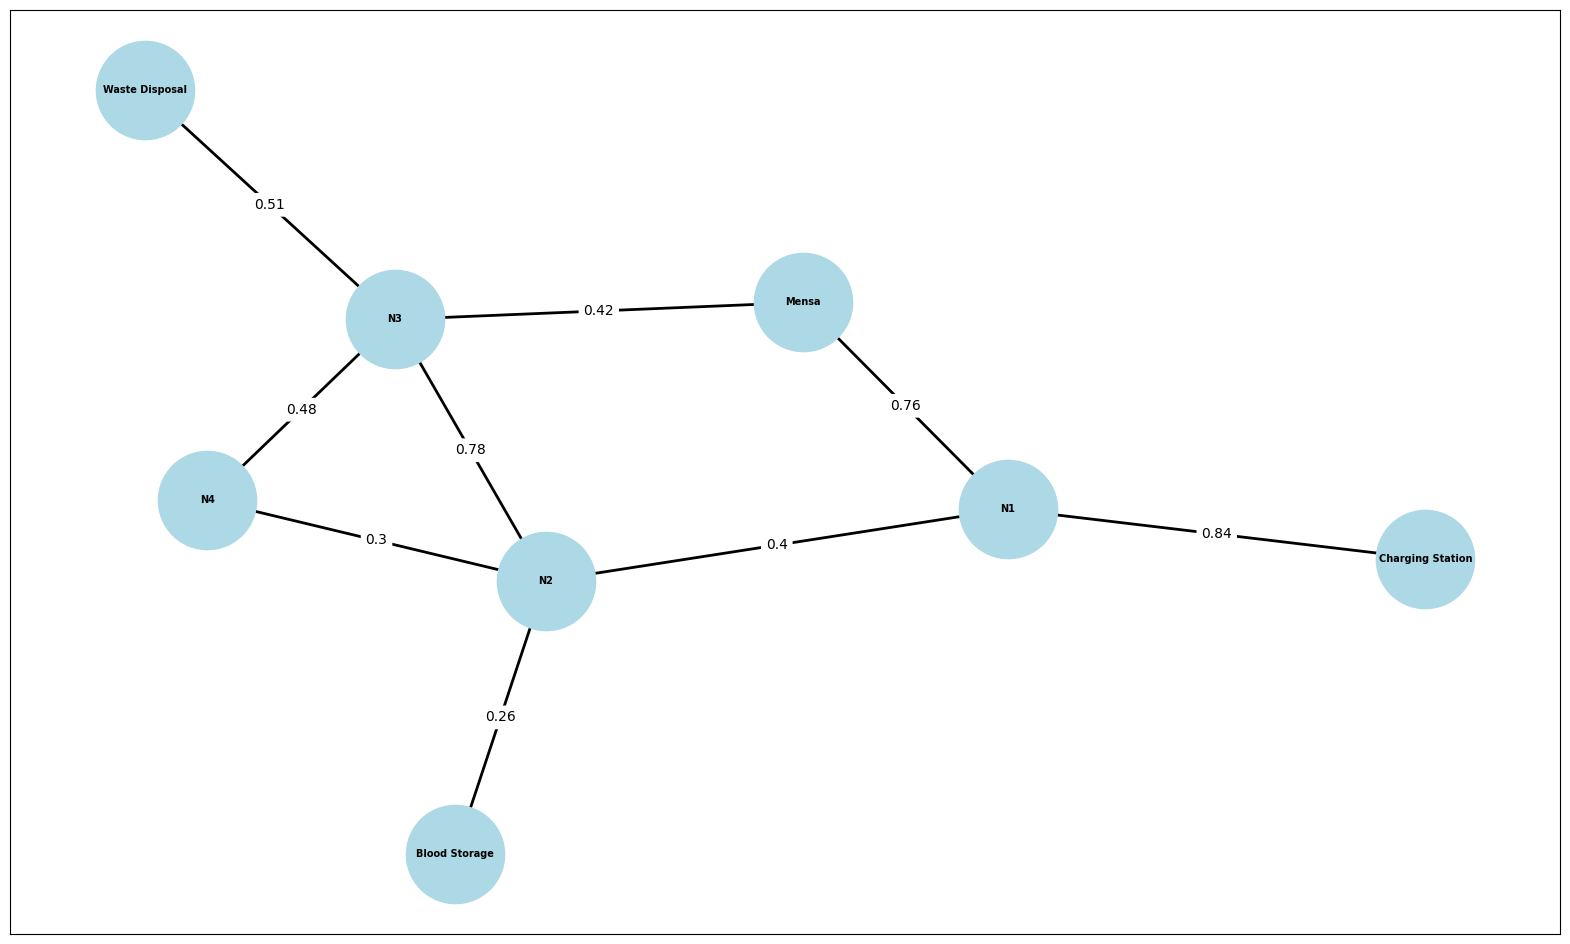

In [7]:
# graph with edge weights
plt.figure(figsize=(20, 12))
nx.draw_networkx(G, with_labels=True, node_size=5000, node_color='lightblue',
                 font_weight='bold', font_size=7, edge_color='black', linewidths=1,
                 width=2, pos=pos)
# add edge weights
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels = edge_weight, rotate=False, label_pos=0.5)
plt.show()

## 3) Shortest Path

In [8]:
# define source and target nodes
source_astar = 'Blood Storage'
target_astar = 'Mensa'

In [9]:
# find shortest path with A* path algorithm
astar_path = nx.astar_path(G, source=source_astar, target=target_astar, heuristic=None, weight='weight')
print('A* Path:', astar_path)
print('A* Path Length:', round(nx.astar_path_length(G, source=source_astar, target=target_astar, heuristic=None, weight='weight'), 2))

A* Path: ['Blood Storage', 'N2', 'N1', 'Mensa']
A* Path Length: 1.42


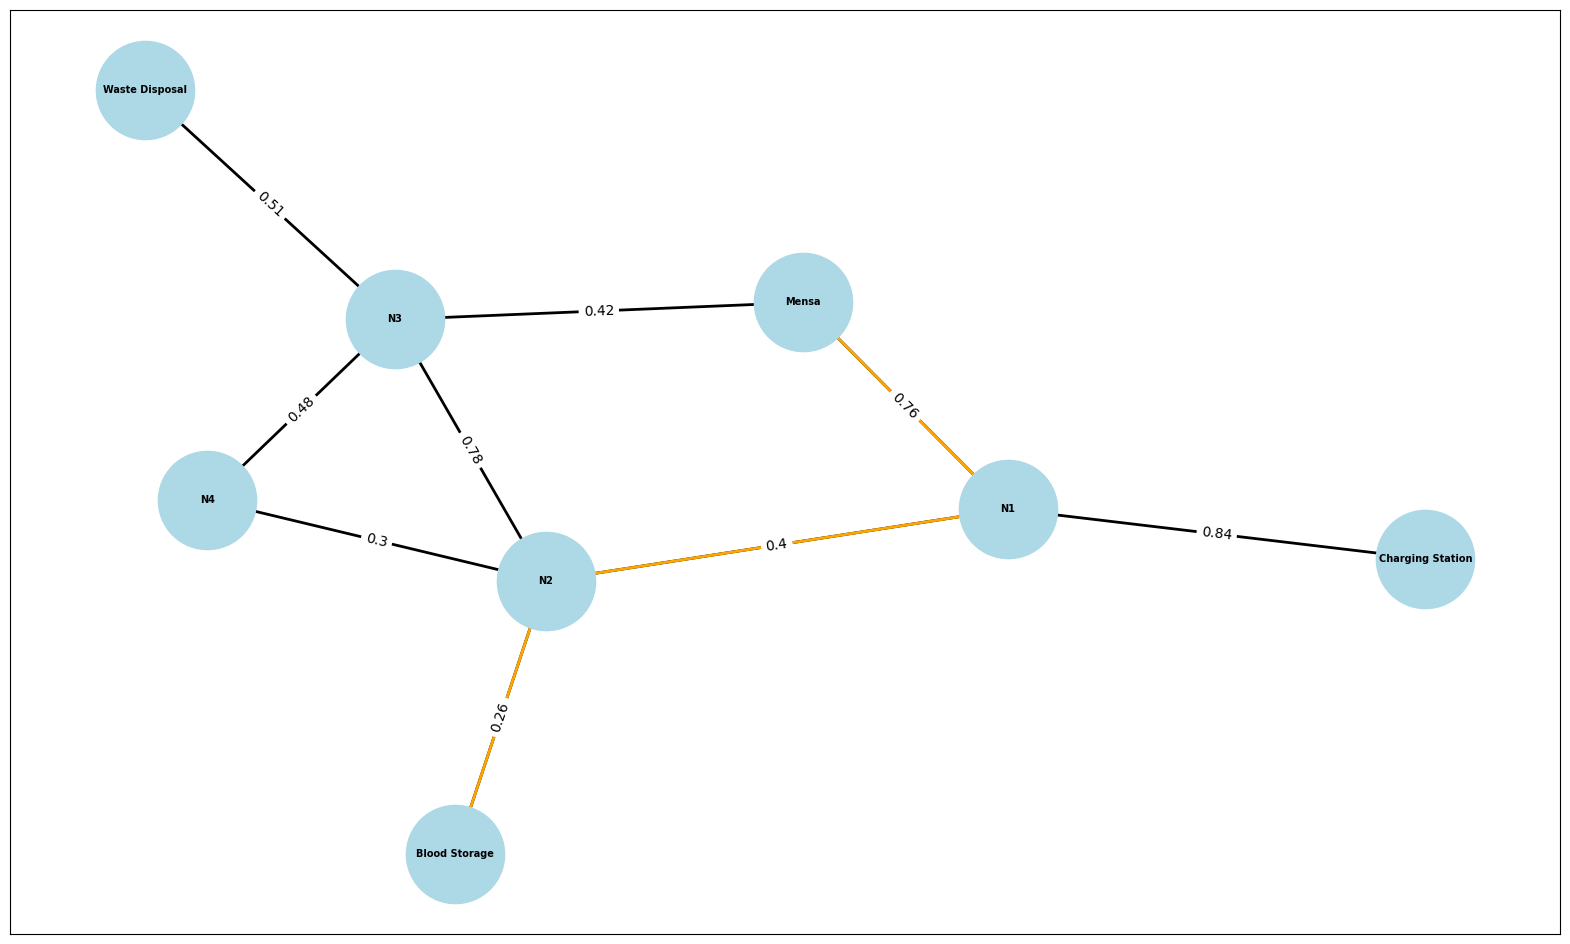

In [10]:
# graph with shortest path
plt.figure(figsize=(20, 12))
nx.draw_networkx(G, with_labels=True, node_size=5000, node_color='lightblue',
                 font_weight='bold', font_size=7, edge_color='black', linewidths=1,
                 width=2, pos=pos)

# shortest path edges in a different color
nx.draw_networkx_edges(G, pos, edgelist=[(astar_path[i], astar_path[i + 1]) for i in range(len(astar_path) - 1)], edge_color='orange', width=2.0)

# edge labels in middle of edges
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')

plt.show()